## ByteCode EXTRACTION

In [1]:
import pandas as pd
import numpy as np
import pandas
import scipy
from sklearn.feature_extraction.text import CountVectorizer

byte_vocab = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"

In [2]:
def byte_bigram():    
    byte_bigram_vocab = []
    for i, v in enumerate(byte_vocab.split(',')):
        for j in range(0, len(byte_vocab.split(','))):
            byte_bigram_vocab.append(v + ' ' +byte_vocab.split(',')[j])
    print(len(byte_bigram_vocab))
    return byte_bigram_vocab

byte_bigram_vocab = byte_bigram()

66049


## Byte BIGRAM Features

In [3]:
from tqdm import tqdm
import os

vector = CountVectorizer(lowercase=False, ngram_range=(2,2), vocabulary=byte_bigram_vocab)
bytebigram_vect = scipy.sparse.csr_matrix((10868, 66049))

for i, file in tqdm(enumerate(os.listdir('train_byte_files'))):
    f = open('train_byte_files/' + file)
    bytebigram_vect[i:]+= vector.fit_transform([f.read().replace('\n', ' ').lower()]).toarray()
    f.close()
    break

!gsutil cp 'bytebigram.npz' gs://microsoft_malware_classification/

0it [00:00, ?it/s]/opt/conda/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
0it [02:09, ?it/s]


## First 800 Pixels - Intensities

In [4]:
image_feat = pd.read_csv('image_features.csv')
image_feat.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_792,pixel_793,pixel_794,pixel_795,pixel_796,pixel_797,pixel_798,pixel_799,pixel_800,img_id
0,72.0,72.0,72.0,69.0,69.0,69.0,65.0,65.0,65.0,68.0,...,114.0,105.0,105.0,105.0,103.0,103.0,103.0,104.0,104.0,6r02dN7YEojsfTQkzlGh
1,72.0,72.0,72.0,69.0,69.0,69.0,65.0,65.0,65.0,68.0,...,114.0,105.0,105.0,105.0,103.0,103.0,103.0,104.0,104.0,b4o8xqvChYEO6mZdDtzK
2,46.0,46.0,46.0,122.0,122.0,122.0,101.0,101.0,101.0,110.0,...,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,9s8NSuY5cHirbLmaWtVe
3,72.0,72.0,72.0,69.0,69.0,69.0,65.0,65.0,65.0,68.0,...,114.0,105.0,105.0,105.0,103.0,103.0,103.0,104.0,104.0,CHsmEGN34c7aSWudtUxh
4,72.0,72.0,72.0,69.0,69.0,69.0,65.0,65.0,65.0,68.0,...,114.0,105.0,105.0,105.0,103.0,103.0,103.0,104.0,104.0,4cPt7qBs9CEIgNkhRXKM


## OPCODE - BIGRAM FEATURES TOP 200

In [5]:
bigram = pd.read_csv('bigram_opcode.csv')
bigram.head()

,mov mov,shl inc,mov pop,add pop,retn push,cmp mov,or shl,add mov,call cmp,mov lea,...,jnb cmp,add retf,imul push,sub jmp,or add,jmp retf,jmp inc,call sub,retf jmp,pop or
0,6,0,1,109,1,1,0,2,0,1,...,0,0,0,0,0,0,0,2,0,0
1,8,0,1,110,0,1,0,1,0,1,...,0,0,0,0,0,0,0,2,0,0
2,840,8,96,3,47,93,8,57,10,63,...,0,0,0,0,0,0,0,2,0,0
3,3,0,1,69,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,3,0,0,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0


## OPCODE - TRIGRAM FEATURES TOP 200

In [6]:
trigram = pd.read_csv('trigram_opcode.csv')
trigram.head()

,push push lea,add pop push,mov mov lea,mov jmp push,call add pop,retn push mov,mov cmp jnb,mov lea mov,sub lea or,mov add cmp,...,jz mov cmp,cmp jz xor,sub xor pop,mov inc cmp,mov sub call,call jmp push,push push call,pop push call,mov mov pop,mov push mov
0,0,37,0,0,83,1,0,0,3,0,...,0,0,0,0,0,0,86,12,0,56
1,0,35,0,0,83,0,0,0,1,0,...,0,0,0,0,0,0,74,11,0,59
2,7,0,18,2,2,22,9,28,0,4,...,2,0,2,6,0,0,26,0,49,78
3,0,21,0,0,52,0,0,0,3,0,...,0,0,0,0,0,0,47,5,0,37
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,42,8,0,5


## OPCODE - FOURGRAM FEATURES TOP 200

In [7]:
fourgram = pd.read_csv('fourgram_opcode.csv')
fourgram.head()

,add pop mov push,sub lea xor push,pop push mov push,push call add pop,sub mov pop call,lea jmp cmp sub,pop jz call mov,add pop retn mov,or inc xor sub,mov shl mov sub,...,mov push mov push,add mov add mov,mov add add mov,mov mov sub cmp,mov mov call lea,call pop add pop,add mov mov cmp,lea mov jz or,cmp jz sub movzx,call mov mov xor
0,9,8,13,81,1,0,0,53,0,0,...,1,0,0,0,0,26,1,0,0,0
1,13,2,19,54,1,0,0,54,0,0,...,4,0,0,0,0,26,1,0,0,0
2,0,0,0,2,0,2,1,1,2,8,...,13,3,0,8,3,0,2,2,0,0
3,11,3,11,50,1,0,0,33,0,0,...,2,0,0,0,0,17,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0


## Labels

In [8]:
Labels = pd.read_csv('opcode_trainLabels.csv')
Labels.head()

,Id,Class
0,5mVLtUwgRfWi3yeCFJsZ,3
1,7vXx2gNhaZedKUtIS4mP,3
2,JyABO1D3n0kxMLIWq25g,2
3,gCBJQKMq14Atfe3ZSRX9,3
4,BsLcIW6ren2ZUDX74Cbu,7


In [9]:
image_feat.rename(columns = {'img_id':'Id'}, inplace = True) 

image_feat = Labels.merge(image_feat, on='Id')

In [10]:
bigram['Id'] = Labels.Id
trigram['Id'] = Labels.Id
fourgram['Id'] = Labels.Id

image_feat = image_feat.merge(bigram, on='Id').merge(trigram, on='Id').merge(fourgram, on='Id')

In [11]:
byte_unigram_with_hexcode_count = pd.read_csv('result_with_size.csv')
opcode_unigram_with_segment_count = pd.read_csv('result_with_size.csv')
byte_unigram_with_hexcode_count.head()

,Unnamed: 0,ID,0,1,2,3,4,5,6,7,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,...,3101,3211,3097,2758,3099,2759,5753,1824,4.234863,9
1,1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,...,439,281,302,7639,518,17001,54902,8588,5.538818,2
2,2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,...,2242,2885,2863,2471,2786,2680,49144,468,3.887939,9
3,3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,...,485,462,516,1133,471,761,7998,13940,0.574219,1
4,4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,...,350,209,239,653,221,242,2199,9008,0.370850,8


In [12]:
opcode_unigram_with_segment_count.head()

,Unnamed: 0,ID,0,1,2,3,4,5,6,7,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,...,3101,3211,3097,2758,3099,2759,5753,1824,4.234863,9
1,1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,...,439,281,302,7639,518,17001,54902,8588,5.538818,2
2,2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,...,2242,2885,2863,2471,2786,2680,49144,468,3.887939,9
3,3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,...,485,462,516,1133,471,761,7998,13940,0.574219,1
4,4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,...,350,209,239,653,221,242,2199,9008,0.370850,8


In [13]:
opcode_unigram_with_segment_count = opcode_unigram_with_segment_count.drop(columns=['Class', 'Unnamed: 0'])
opcode_unigram_with_segment_count.rename(columns = {'size':'asm_file_size', 'ID':'Id'}, inplace = True) 

byte_unigram_with_hexcode_count = byte_unigram_with_hexcode_count.drop(columns=['Class', 'Unnamed: 0'])
byte_unigram_with_hexcode_count.rename(columns = {'size':'byte_file_size', 'ID':'Id'}, inplace = True)

In [14]:
image_feat = image_feat.merge(opcode_unigram_with_segment_count, on='Id').merge(byte_unigram_with_hexcode_count, on='Id')

In [15]:
image_feat.to_csv('final_data.csv', index=False)

In [16]:
image_feat.head()

,Id,Class,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,f8_y,f9_y,fa_y,fb_y,fc_y,fd_y,fe_y,ff_y,??_y,byte_file_size
0,5mVLtUwgRfWi3yeCFJsZ,3,72.0,72.0,72.0,69.0,69.0,69.0,65.0,65.0,...,6167,6030,6240,6109,6074,5930,6656,9882,1517724,9.127686
1,7vXx2gNhaZedKUtIS4mP,3,72.0,72.0,72.0,69.0,69.0,69.0,65.0,65.0,...,3087,3039,2987,3013,3213,3078,3129,3507,1550492,6.842773
2,JyABO1D3n0kxMLIWq25g,2,46.0,46.0,46.0,116.0,116.0,116.0,101.0,101.0,...,3286,424,302,368,3566,359,3553,50444,5932,2.619873
3,gCBJQKMq14Atfe3ZSRX9,3,72.0,72.0,72.0,69.0,69.0,69.0,65.0,65.0,...,6078,6119,6324,6070,6295,6281,6143,9980,1521820,9.127686
4,BsLcIW6ren2ZUDX74Cbu,7,72.0,72.0,72.0,69.0,69.0,69.0,65.0,65.0,...,11,14,32,77,65,14,119,757,1377460,4.055420


In [17]:
y = image_feat['Class']
image_feat = image_feat.drop(columns=['Id', 'Class'])

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(image_feat, y, test_size=0.20, stratify=y)
xtrain, xcv, ytrain, ycv = train_test_split(xtrain, ytrain, test_size=0.20, stratify=ytrain)

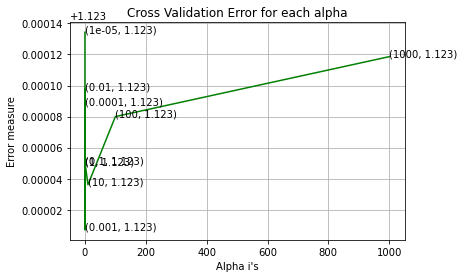

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

alpha = [10 ** x for x in range(-5, 4)]

cv_log_error_array=[]

for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced', solver='saga', n_jobs=-1)
    logisticR.fit(xtrain, ytrain)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(xtrain,ytrain)
    predict_y = sig_clf.predict_proba(xcv)
    cv_log_error_array.append(log_loss(ycv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(xtrain,ytrain)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(xtrain, ytrain)

predict_y = sig_clf.predict_proba(xtrain)
print ('log loss for train data',(log_loss(ytrain, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(xcv)
print ('log loss for cv data',(log_loss(ycv, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(xtest)
print ('log loss for test data',(log_loss(ytest, predict_y, labels=logisticR.classes_, eps=1e-15)))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


log loss for train data 1.1049866992627957
log loss for cv data 1.1048329359695073
log loss for test data 1.1132728894009123


In [25]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

Number of misclassified points  37.35050597976081
-------------------------------------------------- Confusion matrix --------------------------------------------------


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


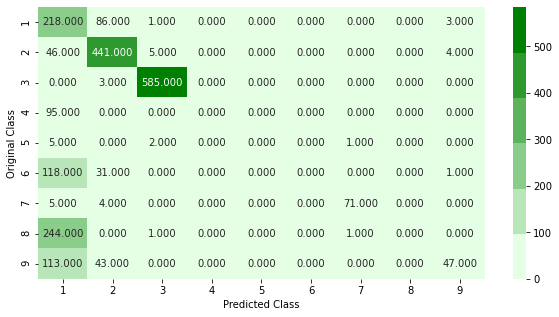

-------------------------------------------------- Precision matrix --------------------------------------------------


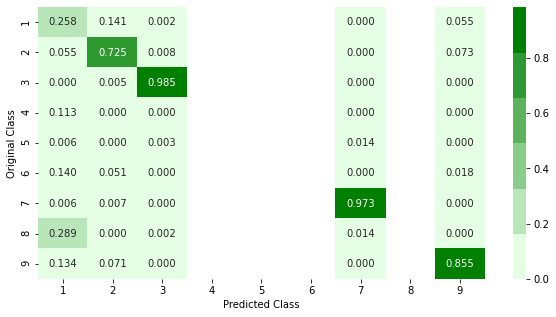

Sum of columns in precision matrix [ 1.  1.  1. nan nan nan  1. nan  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


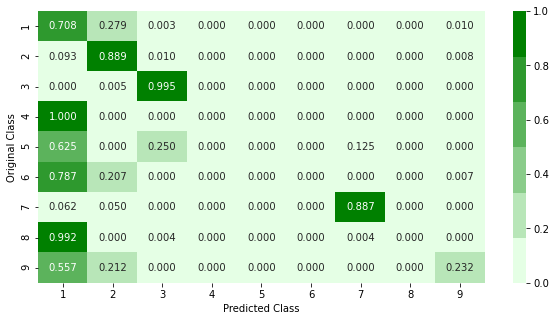

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
import seaborn as sns

plot_confusion_matrix(ytest,sig_clf.predict(xtest))

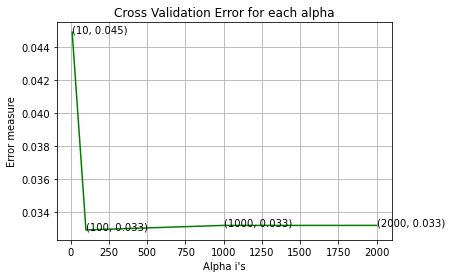

In [32]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

from xgboost import XGBClassifier

alpha=[10,100,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(xtrain,ytrain)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(xtrain,ytrain)
    predict_y = sig_clf.predict_proba(xcv)
    cv_log_error_array.append(log_loss(ycv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
x_cfl=XGBClassifier(n_estimators=2000,nthread=-1)
x_cfl.fit(xtrain,ytrain,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(xtrain, ytrain)

predict_y = sig_clf.predict_proba(xtrain)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(ytrain, predict_y))
predict_y = sig_clf.predict_proba(xcv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(ycv, predict_y))
predict_y = sig_clf.predict_proba(xtest)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(ytest, predict_y))